In [90]:
import pandas as pd
import numpy as np
import hvplot.pandas  # noqa
import matplotlib.pyplot as plt
import logging
import copy
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

import lab_tools
import pickle
logging.basicConfig(level=logging.INFO)
import math
from scipy.constants import mu_0 as mu_0
from uncertainties import ufloat
import uncertainties
from uncertainties import unumpy
from matplotlib import pyplot
import os

In [91]:
def uplot(x_ufloats, y_ufloats):
    plt.errorbar( unumpy.nominal_values(x_ufloats), unumpy.nominal_values(y_ufloats),
      xerr=unumpy.std_devs(x_ufloats), yerr= unumpy.std_devs(y_ufloats), fmt='.',ecolor='green',barsabove=True)

In [92]:
path = r'/Users/user/Documents/semster_c/courses/lab/magnetisem/extension2/first'
path2 = r'/Users/user/Documents/semster_c/courses/lab/magnetisem/extension2/second'
path3 = r'/Users/user/Documents/semster_c/courses/lab/magnetisem/extension2/3'
path4 = r'/Users/user/Documents/semster_c/courses/lab/magnetisem/extension2/high_freq'
path5 = r'/Users/user/Documents/semster_c/courses/lab/magnetisem/extension2/all'
path6 = r'/Users/user/Documents/semster_c/courses/lab/magnetisem/extension2/high_freq_week2'

# d = lab_tools.read_to_dict(path)
d1 = lab_tools.read_to_dict(path)
d2 = lab_tools.read_to_dict(path2)
d3 = lab_tools.read_to_dict(path3)
d4 = lab_tools.read_to_dict(path4)
d6 = lab_tools.read_to_dict(path6)


dict_names1 = [d1,d2,d3]
dict_names2 = [d4]
mod_data = {}

for name in dict_names1:
    for key in name.keys():
        mod_data[key] = name[key]
        for index in range(len(mod_data[key]['x'])):
           mod_data[key]['x'][index] = mod_data[key]['x'][index]/10
        for index in range(len(mod_data[key]['y'])):
            mod_data[key]['y'][index] = mod_data[key]['y'][index]/10

for name in dict_names2:
    for key in name.keys():
        mod_data[key] = name[key]


KeyboardInterrupt: 

In [4]:
impedance = []
imp_freq = []
R = ufloat(19.2,0.15)

for x in mod_data.keys():
    amp1 = abs((max(mod_data[x]['y'])-min(mod_data[x]['y'])))
    amp2 = abs((max(mod_data[x]['x'])-min(mod_data[x]['x'])))
    imp_freq.append(int(x))
    impedance.append(R*(amp1/amp2))

# for x in d6.keys():
#     amp1 = abs((max(d6[x]['y'])-min(d6[x]['y'])))
#     amp2 = abs((max(d6[x]['x'])-min(d6[x]['x'])))
#     imp_freq.append(int(x))
#     impedance.append(R*(amp1/amp2))

In [ ]:
logging.basicConfig(level=logging.WARNING)

phases = []
frequencies = []
amplitudes = []
faild_fits = {}

def find_phase(w,a1,w1,p1,c1,a2,w2,p2,c2):
    f = 2 * np.pi / w
    return f * np.abs(p1 - p2)

def find_z(w,a1,w1,p1,c1,a2,w2,p2,c2):
    return a2 / a1

def find_w(w,a1,w1,p1,c1,a2,w2,p2,c2):
    return w1


funcs = {'phase': find_phase, 'z': find_z,'freq_in':find_w}
limits = {'z': [0, 10000]}


for freq, df in copy.deepcopy(mod_data).items():
    float_freq = float(freq)
    logging.info(f"frequency is {freq}")
    result = lab_tools.extract_data_from_fit(funcs, df, float_freq, display=False)

    if result:
        frequencies.append(result['freq_in'])
        phases.append(result['phase'])
        amplitudes.append(result['z'])

    else:
        faild_fits[freq] = df
        del mod_data[freq]


fit failed for frequency 180.0


fit failed for frequency 130.0


fit failed for frequency 100.0


fit failed for frequency 1836600.0


fit failed for frequency 7016600.0


In [103]:
freq2 = []
for i in range(len(frequencies)):
    freq2.append(ufloat(frequencies[i], frequencies[i] * 0.01))



In [110]:
L = ufloat(0.0125,0.00025)
R = ufloat(19.2,0.1)
r = ufloat(0.02,0.003)
A = 2*math.pi*(r**2)
l = 2*r
N_square = (L*l)/(A*mu_0)

R_effective = []
L_effective = []
L = ufloat(0.0125,0.0008)
for index in range(len(amplitudes)):
    R_effective.append(amplitudes[index]*math.cos(phases[index]) - R)
    L_effective.append((amplitudes[index]*math.sin(phases[index]))/frequencies[index])

Real_mu = []
Im_mu = []

for index in range(len(R_effective)):
    Im_mu.append(l*R_effective[index]/(mu_0**2*frequencies[index]*N_square*A))
    Real_mu.append(l*L_effective[index]/(mu_0**2*N_square*A))


In [108]:
frequencies = np.array(copy.deepcopy(freq2))

In [96]:
permeability = []
for index in range(len(Im_mu)):
    permeability.append(((Im_mu[index]**2 + Real_mu[index]**2)**0.5)/mu_0)

In [93]:
import pandas as pd
import numpy as np
import hvplot.pandas  # noqa
import matplotlib.pyplot as plt
import logging
import copy
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

import lab_tools
import pickle
logging.basicConfig(level=logging.INFO)
import math
from scipy.constants import mu_0 as mu_0
from uncertainties import ufloat
import uncertainties
from uncertainties import unumpy
from matplotlib import pyplot
import os

def uplot(x_ufloats, y_ufloats):
    plt.errorbar( unumpy.nominal_values(x_ufloats), unumpy.nominal_values(y_ufloats),
      xerr=unumpy.std_devs(x_ufloats), yerr= unumpy.std_devs(y_ufloats), fmt='.',ecolor='green',barsabove=True)

def load_pickle(name):
    with open(os.path.join('pickles',f'{name}.pickle'), 'rb') as handle:
        return pickle.load(handle)

def save_pickle(name, pick):
    with open(os.path.join('pickles',f'{name}.pickle'), 'wb') as handle:
        return pickle.dump(pick,handle)

globals().update(load_pickle('freq_measurements'))

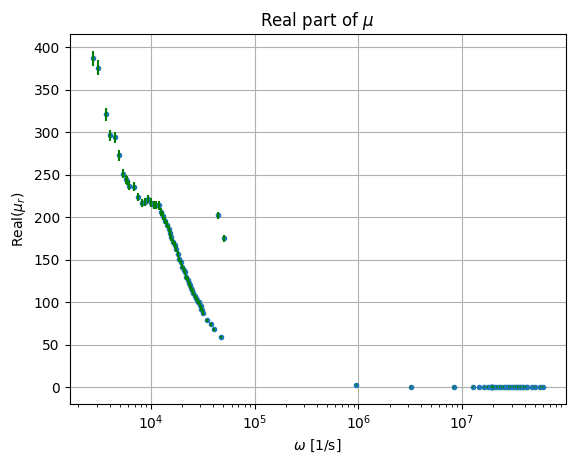

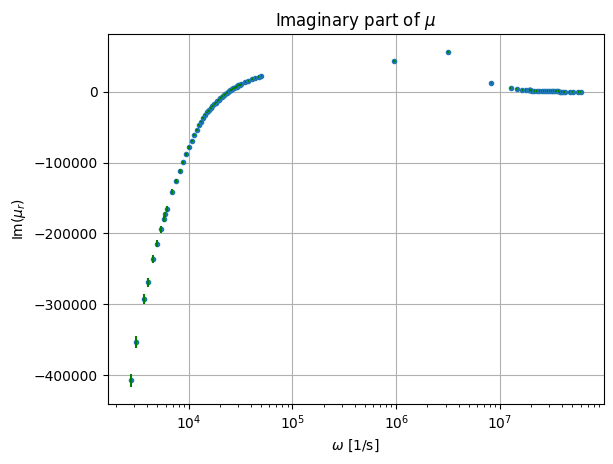

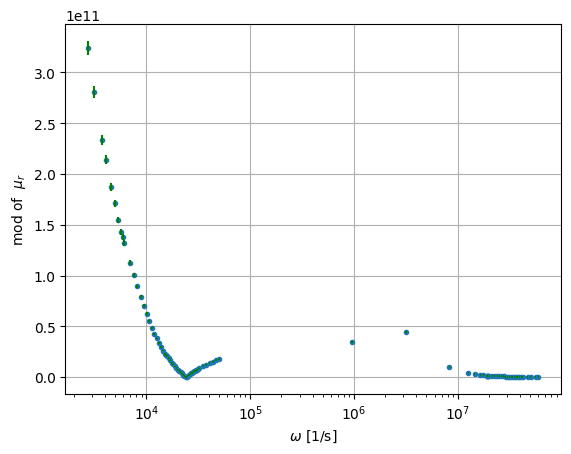

In [111]:

fig1 = plt.figure()
uplot(frequencies, Real_mu)
pyplot.xlabel('$\omega$'+' [1/s]')
pyplot.ylabel('Real($\mu_r$)')
pyplot.title('Real part of $\mu$')
pyplot.xscale('log')
plt.grid()
plt.savefig('images/real.svg', format='svg')

fig2 = plt.figure()
uplot(frequencies, Im_mu)
pyplot.xlabel('$\omega$'+' [1/s]')
pyplot.ylabel('Im($\mu_r$)')
pyplot.xscale('log')
pyplot.title('Imaginary part of $\mu$')
plt.grid()
plt.savefig('images/im.svg', format='svg')

fig3 = plt.figure()
pyplot.xlabel('$\omega$'+' [1/s]')
pyplot.ylabel('mod' + ' of ' + ' $\mu_{r}$')
uplot(frequencies, permeability)
pyplot.xscale('log')
plt.grid()
plt.savefig('images/modulus.svg', format='svg')


In [ ]:
def load_pickle(name):
    with open(os.path.join('pickles',f'{name}.pickle'), 'rb') as handle:
        return pickle.load(handle)

def save_pickle(name, pick):
    with open(os.path.join('pickles',f'{name}.pickle'), 'wb') as handle:
        return pickle.dump(pick,handle)

In [113]:
import os

df = pd.DataFrame(
    {'frequencies':np.array(unumpy.nominal_values(frequencies)),
     'Real_mu':np.array(unumpy.nominal_values(Real_mu)),
     'Im_mu':np.array(unumpy.nominal_values(Im_mu)),
      'permeability':np.array(unumpy.nominal_values(permeability)),
      'amplitudes': np.array(unumpy.nominal_values(amplitudes)),
      'phases': np.array(unumpy.nominal_values(phases)),
      }
    )


df_with_errors = pd.DataFrame(
    {'frequencies':np.array(frequencies),
     'Real_mu':np.array(Real_mu),
     'Im_mu':np.array(Im_mu),
      'permeability':np.array(permeability),
      'amplitudes': np.array(amplitudes),
      'phases': np.array(phases),
      }
    )


def load_pickle(name):
    with open(os.path.join('pickles',f'{name}.pickle'), 'rb') as handle:
        return pickle.load(handle)

def save_pickle(name, pick):
    with open(os.path.join('pickles',f'{name}.pickle'), 'wb') as handle:
        return pickle.dump(pick,handle)

df = df.sort_values('frequencies')
df_with_errors = df_with_errors.sort_values('frequencies')

to_pickle =  {'frequencies':np.array(unumpy.nominal_values(frequencies)),
     'Real_mu':np.array(unumpy.nominal_values(Real_mu)),
     'Im_mu':np.array(unumpy.nominal_values(Im_mu)),
      'permeability':np.array(unumpy.nominal_values(permeability)),
      'amplitudes': np.array(unumpy.nominal_values(amplitudes)),
      'phases': np.array(unumpy.nominal_values(phases)),
      'freq_data_frame':df,       
      'freq_data_frame_with_errors':df_with_errors
      }
save_pickle('freq_measurements',to_pickle)


df.to_csv('freq_measurements.csv')


In [18]:
# df.hvplot.scatter(x='frequencies', y=['Real_mu', 'Im_mu'] )
df.hvplot.scatter(x='frequencies', y=['Real_mu'] )

:Scatter   [frequencies]   (Real_mu)

In [22]:
df = copy.deepcopy(df2)

In [31]:
df = df[10:40]
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [87]:
# fit_params image
c = -2.9e5
t = 4.1e-5
u = 5.8e5

# fit_params real
c = 5.547
t = 5.158e-05
u = 285.1


def f(x,u,t,c):
    return u * t* x / (1+t**2*x**2) + c 


fig = make_subplots(specs=[[{"secondary_y": True}]])


# Add traces
# fig.add_trace(
#     go.Scatter(x=df['frequencies'], y=df['Real_mu'], name="real part"),
#     secondary_y=False,
# )

fig.add_trace(
    go.Scatter(x=df['frequencies'], y=f(df['frequencies'], u, t, c), name="fitting"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df['frequencies'], y=f(df['frequencies'], u, t, c), name="fitting"),
    secondary_y=False,
)


fig.add_trace(
    go.Scatter(x=df['frequencies'], y=df['Im_mu'], name="imaginary part", ),
    secondary_y=True,
)

fig.show()
X = np.arange(-1e4, 1e5, 1e3)
px.line(x=X, y=f(X, u, t, c))


In [56]:
X = np.arange()
px.line()

In [64]:
df.hvplot.scatter(x='frequencies', y=['Real_mu', 'Im_mu'])

:NdOverlay   [Variable]
   :Scatter   [frequencies]   (value)

In [33]:

df.to_csv('freq_measurements.csv')

<function lab_tools.uplot(x_ufloats, y_ufloats)>

In [ ]:
w = 2.45e+4
udc = 2 * 610
tau = 1 / w

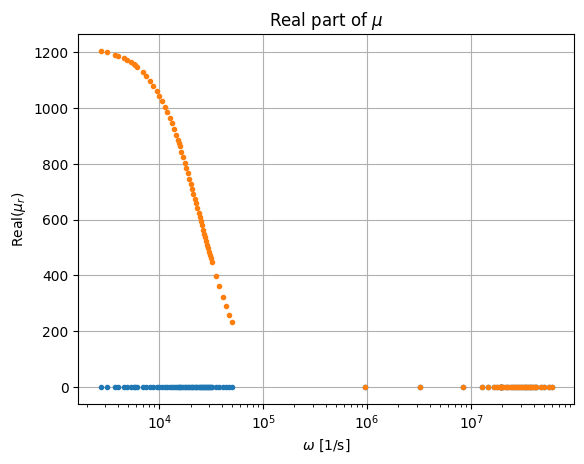

In [ ]:
def real_thiory(udc, tau, w_list):
    return udc  / ((1 + w_list**2 * tau**2))

def im_thiory(udc, tau, w_list):
    return udc * w_list * tau / ((1 + w_list**2 * tau**2))

# w_list = np.exp(np.linspace(8, 20, 50))
# w_list = np.linspace(8, 20, 50)
fig1 = plt.figure()
uplot(frequencies, Real_mu)
# uplot(frequencies, Im_mu)
plt.plot(frequencies, real_thiory(udc, tau, frequencies), '.')
pyplot.xlabel('$\omega$'+' [1/s]')
pyplot.ylabel('Real($\mu_r$)')
pyplot.title('Real part of $\mu$')
pyplot.xscale('log')
plt.grid()
# plt.savefig('images/real.svg', format='svg')

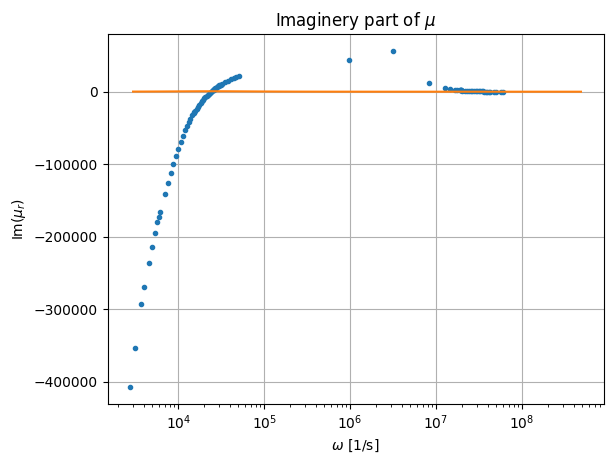

In [ ]:
w_list = np.exp(np.linspace(8, 20, 50))
fig1 = plt.figure()
# uplot(frequencies, Real_mu)
uplot(frequencies, Im_mu)
plt.plot(w_list, im_thiory(udc, tau, w_list))
pyplot.xlabel('$\omega$'+' [1/s]')
pyplot.ylabel('Im($\mu_r$)')
pyplot.title('Imaginery part of $\mu$')
pyplot.xscale('log')
plt.grid()